In [ ]:
# Run to install all the necessary packages for the project

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

# Install more packages using %pip as needed

In [ ]:
# Loading the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# Add more packages as needed

## Data Link
[Kaggle](https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset)
[Github](https://github.com/AlexPazCodesUCSD/CSE151AGroupProject/blob/main/amazon_delivery.csv)

In [ ]:
# Data Download into Google Colab

!wget https://raw.githubusercontent.com/AlexPazCodesUCSD/CSE151AGroupProject/main/amazon_delivery.csv

# Run only once, you can see the file by clicking the file icon on the leftside of the colab notebook

--2024-07-31 18:25:58--  https://raw.githubusercontent.com/AlexPazCodesUCSD/CSE151AGroupProject/main/amazon_delivery.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5971175 (5.7M) [text/plain]
Saving to: ‘amazon_delivery.csv’

amazon_delivery.csv 100%[===================>]   5.69M  --.-KB/s    in 0.06s   

2024-07-31 18:25:59 (96.7 MB/s) - ‘amazon_delivery.csv’ saved [5971175/5971175]



In [ ]:
# Loading Data

data = pd.read_csv('amazon_delivery.csv')

data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


# Data Clean Up

In [ ]:
# The initial dimensions of the dataset
initial_dimensions = data.shape

# Identify columns with missing values and count the number of missing values in each
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

# Print out the columns with missing values and the count of missing values in each
print("Columns with missing values and the count of missing values:")
print(columns_with_missing_values)

# Cleaning the data by dropping rows with missing values
cleaned_data = data.dropna()

# The dimensions of the cleaned dataset
cleaned_dimensions = cleaned_data.shape

# Print out the dimensions
print(f"Initial Data Dimensions: # of observations = {initial_dimensions[0]}")
print(f"Cleaned Data Dimensions: # of observations = {cleaned_dimensions[0]}")

data = cleaned_data

Columns with missing values and the count of missing values:
Agent_Rating    54
Weather         91
dtype: int64
Initial Data Dimensions: # of observations = 43739
Cleaned Data Dimensions: # of observations = 43594


## Creating More Features \(Data Preprocessing\)

In [ ]:
# Function to calculate distance in miles between store and drop-off locations
def calculate_distance(row):
    store_location = (row['Store_Latitude'], row['Store_Longitude'])
    drop_location = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_location, drop_location).miles

# Function to determine the delivery season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Convert Order_Date, Order_Time, and Pickup_Time to appropriate datetime formats
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%Y-%m-%d')
data['Order_Time'] = pd.to_datetime(data['Order_Time'], format='%H:%M:%S').dt.time
data['Pickup_Time'] = pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S').dt.time


data['Distance_Miles'] = data.apply(calculate_distance, axis=1)
data['Delivery_Season'] = data['Order_Date'].apply(get_season)

# Add more if desired

data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_Miles,Delivery_Season
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,1.876999,Spring
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,12.516738,Spring
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,0.962935,Spring
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,4.830848,Spring
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,3.851195,Spring


# Dataset Column Descriptions and Statistics

1. **Order_ID**: Unique identifier for each order.
2. **Agent_Age**: Age of the delivery agent.
3. **Agent_Rating**: Rating of the delivery agent.
4. **Store_Latitude**: Latitude of the store location.
5. **Store_Longitude**: Longitude of the store location.
6. **Drop_Latitude**: Latitude of the drop-off location.
7. **Drop_Longitude**: Longitude of the drop-off location.
8. **Order_Date**: Date of the order.
9. **Order_Time**: Time of the order.
10. **Pickup_Time**: Time the order was picked up.
11. **Weather**: Weather conditions during delivery.
12. **Traffic**: Traffic conditions during delivery.
13. **Vehicle**: Type of vehicle used for delivery.
14. **Area**: Area type (e.g., Urban, Metropolitan).
15. **Delivery_Time**: Time taken for delivery (in minutes).
16. **Category**: Category of the delivered item.
17. **Distance_Miles**: Distance in miles between the store and the drop-off location, calculated using latitude and longitude.
18. **Delivery_Season**: The season during which the delivery was made, derived from the order date.


In [ ]:
# Function to analyze and provide information on each column
def analyze_column(data, column_name):
    col_data = data[column_name]
    col_info = {}

    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(col_data):
        if "latitude" in column_name.lower() or "longitude" in column_name.lower():
            col_info['type'] = 'Geographical coordinates'
            col_info['description'] = 'Latitude and longitude values should not be analyzed statistically.'
        else:
            col_info['type'] = 'Numerical'
            col_info['statistics'] = col_data.describe().to_dict()

    # Check if the column is categorical
    elif pd.api.types.is_string_dtype(col_data):
        if column_name.lower() == 'order_id':
            col_info['type'] = 'Unique identifier'
            col_info['description'] = 'Unique ID for each order.'
        else:
            col_info['type'] = 'Categorical'
            col_info['unique_values'] = col_data.nunique()
            col_info['categories'] = col_data.value_counts().to_dict()

    # Check if the column is datetime
    elif pd.api.types.is_datetime64_any_dtype(col_data):
        col_info['type'] = 'Datetime'
        col_info['description'] = 'Datetime values for orders and pickups.'

    # Check if the column is time
    elif pd.api.types.is_object_dtype(col_data) and column_name.lower().endswith('_time'):
        col_info['type'] = 'Time'
        col_info['description'] = 'Time values for orders and pickups.'

    else:
        col_info['type'] = 'Other'
        col_info['description'] = 'Other type of data.'

    return col_info

column_analysis = {}
for column in data.columns:
    column_analysis[column] = analyze_column(data, column)

for column, analysis in column_analysis.items():
    print(f"Column: {column}")
    for key, value in analysis.items():
        print(f"  {key}: {value}")
    print()


print("First few rows of the updated dataset:")
data.head()


Column: Order_ID
  type: Unique identifier
  description: Unique ID for each order.

Column: Agent_Age
  type: Numerical
  statistics: {'count': 43594.0, 'mean': 29.55571867688214, 'std': 5.760689023877086, 'min': 20.0, '25%': 25.0, '50%': 30.0, '75%': 35.0, 'max': 39.0}

Column: Agent_Rating
  type: Numerical
  statistics: {'count': 43594.0, 'mean': 4.635286966096252, 'std': 0.31382654114941966, 'min': 2.5, '25%': 4.5, '50%': 4.7, '75%': 4.9, 'max': 5.0}

Column: Store_Latitude
  type: Geographical coordinates
  description: Latitude and longitude values should not be analyzed statistically.

Column: Store_Longitude
  type: Geographical coordinates
  description: Latitude and longitude values should not be analyzed statistically.

Column: Drop_Latitude
  type: Geographical coordinates
  description: Latitude and longitude values should not be analyzed statistically.

Column: Drop_Longitude
  type: Geographical coordinates
  description: Latitude and longitude values should not be anal

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_Miles,Delivery_Season
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,1.876999,Spring
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,12.516738,Spring
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,0.962935,Spring
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,4.830848,Spring
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,3.851195,Spring


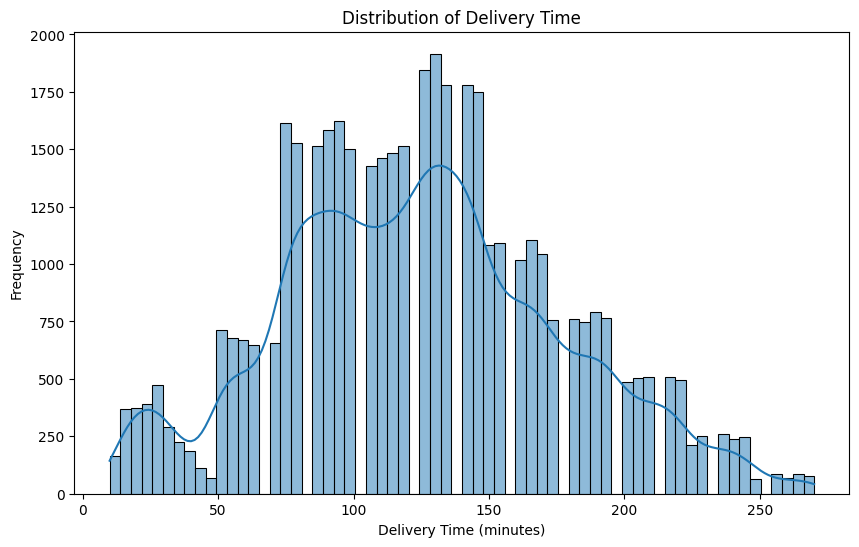

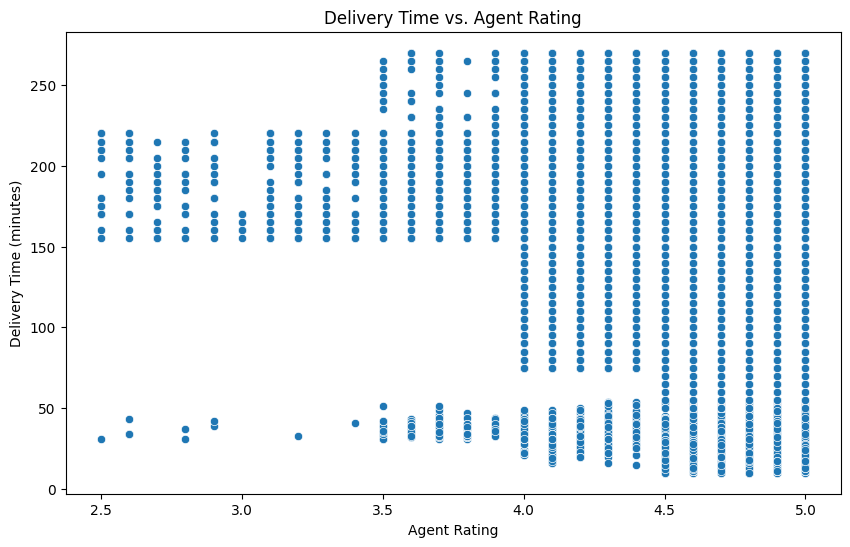

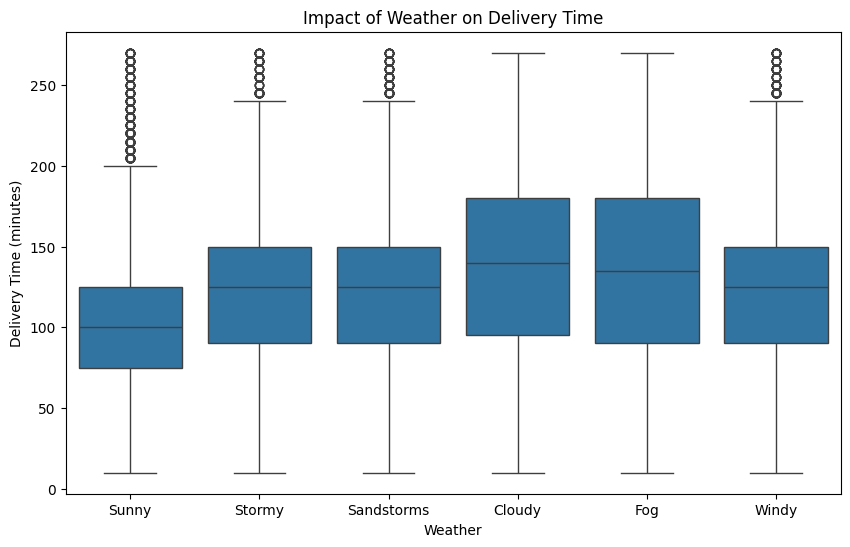

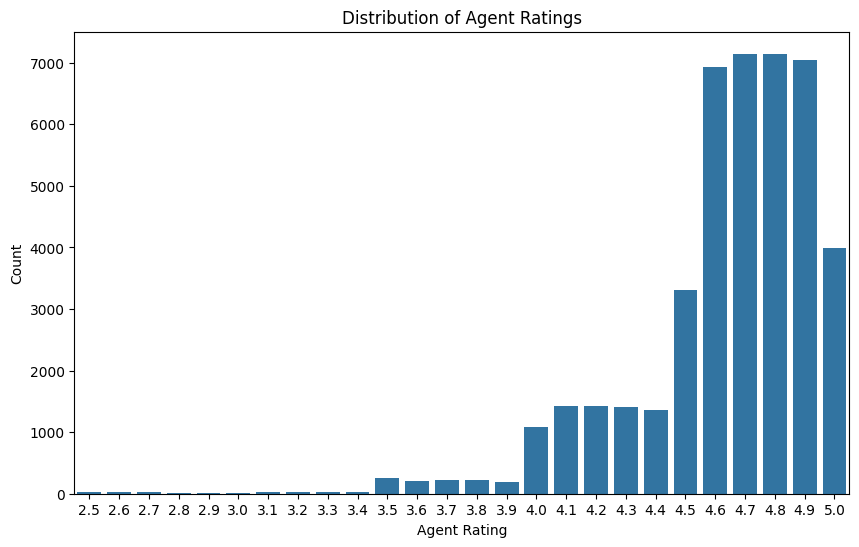

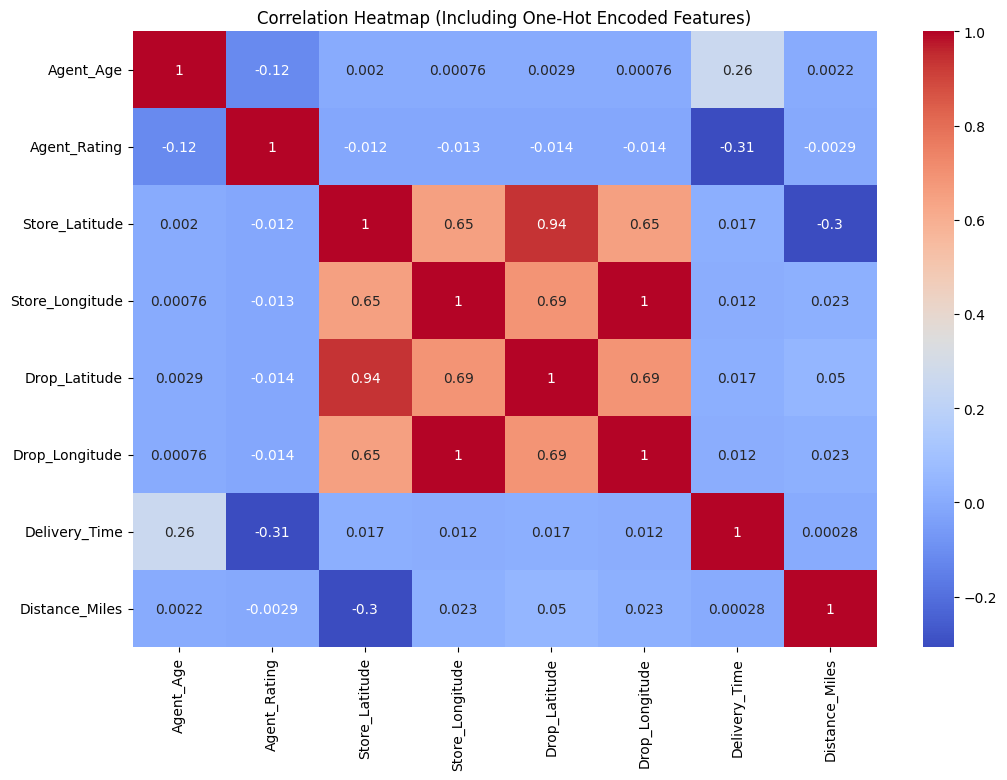

In [ ]:
# Perform data exploration steps on the data. With this data we eventually plan on predicting the agent ratings

import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for plotting

# Distribution of Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery_Time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Relationship between Delivery Time and Agent Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=data)
plt.title('Delivery Time vs. Agent Rating')
plt.xlabel('Agent Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Impact of Weather on Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time', data=data)
plt.title('Impact of Weather on Delivery Time')
plt.xlabel('Weather')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Distribution of Agent Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent_Rating', data=data)
plt.title('Distribution of Agent Ratings')
plt.xlabel('Agent Rating')
plt.ylabel('Count')
plt.show()

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float', 'int', 'uint8'])  # Include 'uint8' for one-hot encoded columns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr() # Calculate correlation on numerical data
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Including One-Hot Encoded Features)')
plt.show()


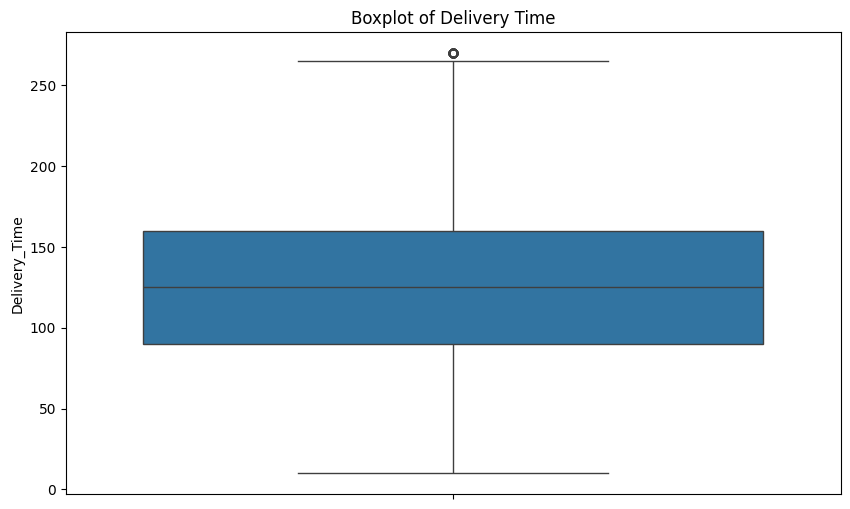

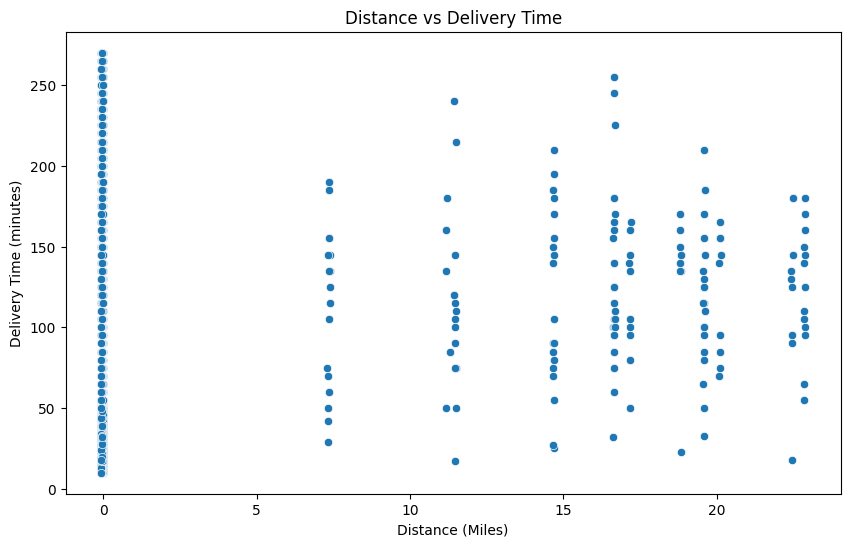

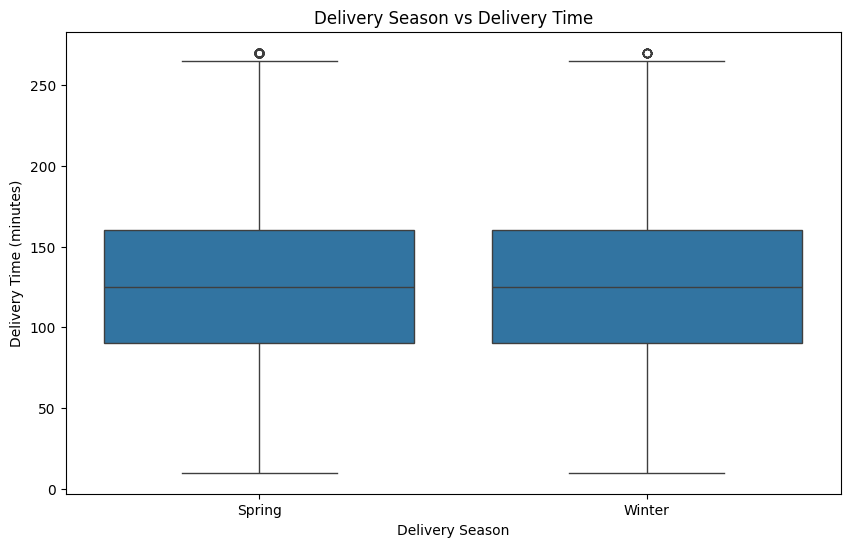

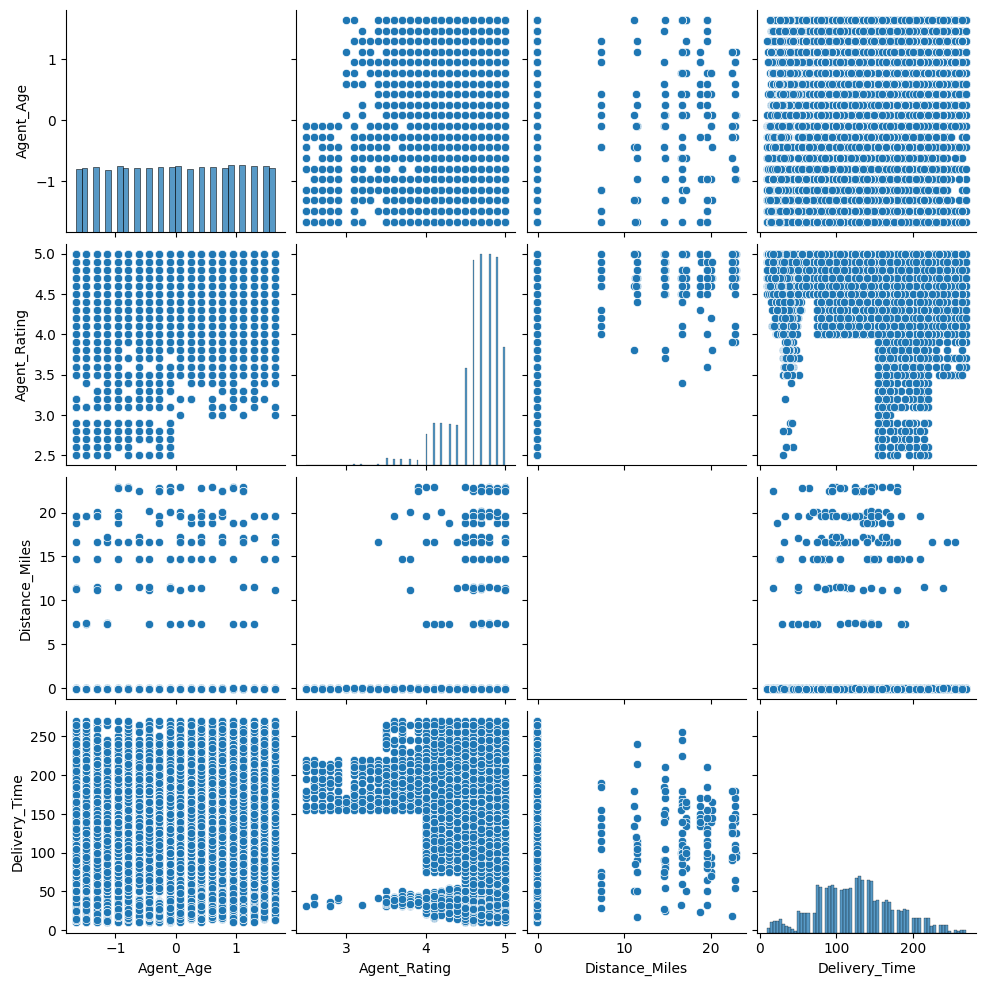

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Further Data Exploration and Preprocessing

# 1. Time-based Features:

# Extract hour of the day from Order_Time and Pickup_Time
data['Order_Hour'] = pd.to_datetime(data['Order_Time'], format='%H:%M:%S').dt.hour
data['Pickup_Hour'] = pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S').dt.hour

# Create a feature for time elapsed between order and pickup
data['Order_Pickup_Time_Diff'] = (pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S') -
                                   pd.to_datetime(data['Order_Time'], format='%H:%M:%S')).dt.total_seconds() / 60

# 2. Categorical Feature Encoding:

# Check if the columns exist before one-hot encoding
if all(col in data.columns for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']):
    data = pd.get_dummies(data, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'])
else:
    print("Warning: One or more categorical columns not found. Skipping one-hot encoding.")

# Visualize the distribution of Delivery_Time to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['Delivery_Time'])
plt.title('Boxplot of Delivery Time')
plt.show()

# using IQR to handle outliers:
Q1 = data['Delivery_Time'].quantile(0.25)
Q3 = data['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# data = data[(data['Delivery_Time'] >= lower_bound) & (data['Delivery_Time'] <= upper_bound)]

# 4. Feature Scaling:

# Standardize or normalize numerical features (Agent_Age, Agent_Rating, Distance_Miles, etc.)
# to ensure they have a similar scale, which can improve model performance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#numerical_features = ['Agent_Age', 'Agent_Rating', 'Distance_Miles', 'Order_Hour', 'Pickup_Hour', 'Order_Pickup_Time_Diff'] #change
numerical_features = ['Agent_Age', 'Distance_Miles', 'Order_Hour', 'Pickup_Hour', 'Order_Pickup_Time_Diff']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 5. Additional Visualizations:

# Explore relationships between other features and Delivery_Time:

# - Scatter plots for numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_Miles', y='Delivery_Time', data=data)
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (Miles)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# - Boxplots or violin plots for categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_Season', y='Delivery_Time', data=data)
plt.title('Delivery Season vs Delivery Time')
plt.xlabel('Delivery Season')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# - Pair plots to visualize relationships between multiple variables
sns.pairplot(data[['Agent_Age', 'Agent_Rating', 'Distance_Miles', 'Delivery_Time']])
plt.show()

# 6. Feature Engineering:

# Day of the week and weekend indicator
data['Day_of_Week'] = data['Order_Date'].dt.dayofweek # Monday=0, Sunday=6
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)





# Model 1: Linear Regression


Training Mean Squared Error: 0.08898122224451493
Training Mean Squared Error: 0.08912060535009948
R-squared Training: 0.0970943396424524
R-squared Testing: 0.09232183052845788
Coeffecients: [-0.01447482 -0.00117271 -0.00178528]
Actual ratings range:
Minimum: 2.5
Maximum: 5.0
Mean: 4.635286966096252

Unique values in Agent_Rating:
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]


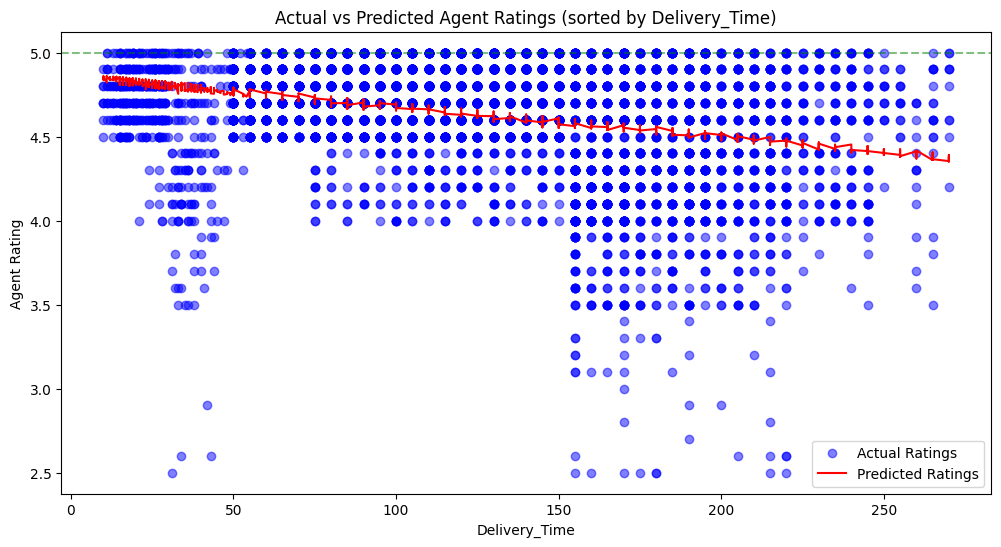

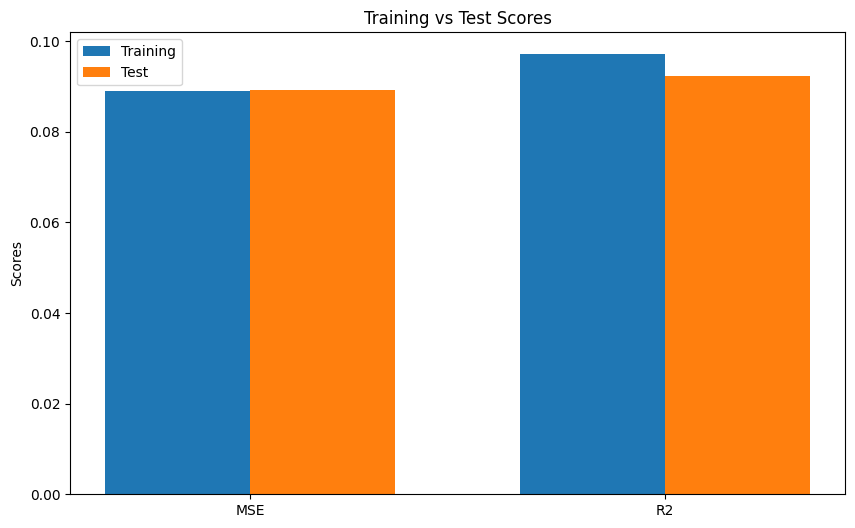

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = data[['Agent_Age', 'Distance_Miles', 'Delivery_Time']]
y = data['Agent_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_training = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate performance metrics
training_mse = mean_squared_error(y_train, y_pred_training)
testing_mse = mean_squared_error(y_test, y_pred_test)
r2_training = r2_score(y_train, y_pred_training)
r2_testing = r2_score(y_test, y_pred_test)

# Print the performance metrics
print(f"Training Mean Squared Error: {training_mse}")
print(f"Training Mean Squared Error: {testing_mse}")
print(f"R-squared Training: {r2_training}")
print(f"R-squared Testing: {r2_testing}")
print(f"Coeffecients: {model.coef_}")

print("Actual ratings range:")
print(f"Minimum: {y.min()}")
print(f"Maximum: {y.max()}")
print(f"Mean: {y.mean()}")
print("\nUnique values in Agent_Rating:")
print(y.unique())

# Choose a feature to sort by (e.g., Delivery_Time)
sort_feature = 'Delivery_Time'
sort_index = X_test[sort_feature].argsort()

# Sort the actual and predicted values
y_test_sorted = y_test.iloc[sort_index]
y_pred_sorted = y_pred_test[sort_index]
x_axis = X_test[sort_feature].sort_values()

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for actual ratings
plt.scatter(x_axis, y_test_sorted, alpha=0.5, color='blue', label='Actual Ratings')

# Line plot for predicted ratings
plt.plot(x_axis, y_pred_sorted, color='red', label='Predicted Ratings')

plt.title(f'Actual vs Predicted Agent Ratings (sorted by {sort_feature})')
plt.xlabel(sort_feature)
plt.ylabel('Agent Rating')
plt.legend()

# Add a horizontal line at y=5 to show the maximum rating
plt.axhline(y=5, color='green', linestyle='--', alpha=0.5)

plt.show()

metrics = ['MSE', 'R2']
train_scores = [training_mse, r2_training]
test_scores = [testing_mse, r2_testing]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], train_scores, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Training vs Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()



#Updated Model with Different Features

In this section we change the parameters of our first model. We include one-hot encoded features that may help predict rating better. We previously one-hot encoded category, area, weather, and and traffic.

In [ ]:
print(data.columns)

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Delivery_Time', 'Distance_Miles',
       'Delivery_Season', 'Order_Hour', 'Pickup_Hour',
       'Order_Pickup_Time_Diff', 'Weather_Cloudy', 'Weather_Fog',
       'Weather_Sandstorms', 'Weather_Stormy', 'Weather_Sunny',
       'Weather_Windy', 'Traffic_High ', 'Traffic_Jam ', 'Traffic_Low ',
       'Traffic_Medium ', 'Vehicle_motorcycle ', 'Vehicle_scooter ',
       'Vehicle_van', 'Area_Metropolitian ', 'Area_Other', 'Area_Semi-Urban ',
       'Area_Urban ', 'Category_Apparel', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Jewelry',
       'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies',
       'Category_Shoes', 'Category_Skincare', 'Category_Snacks',
       'Category_Sports', 'Category_Toys', 'Da

Model 1 version 2
Training Mean Squared Error: 0.08294905389476812
Training Mean Squared Error: 0.08354080011545595
R-squared Training: 0.15830364661566365
R-squared Testing: 0.14915119542665434
Coeffecients: [ 3.86006265e-03 -1.21513898e-03 -3.12989967e-03 -1.27270940e+09
 -1.27270940e+09 -1.27270940e+09 -1.27270940e+09 -1.27270940e+09
 -1.27270940e+09 -8.32656237e+07 -8.32656237e+07 -8.32656238e+07
 -8.32656237e+07  1.67112434e+08  1.67112434e+08  1.67112434e+08
  7.60022600e+08  7.60022600e+08  7.60022600e+08  7.60022600e+08
 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08
 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08
 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08
 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08 -3.58258574e+08]
Actual ratings range:
Minimum: 2.5
Maximum: 5.0
Mean: 4.635286966096252

Unique values in Agent_Rating:
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9

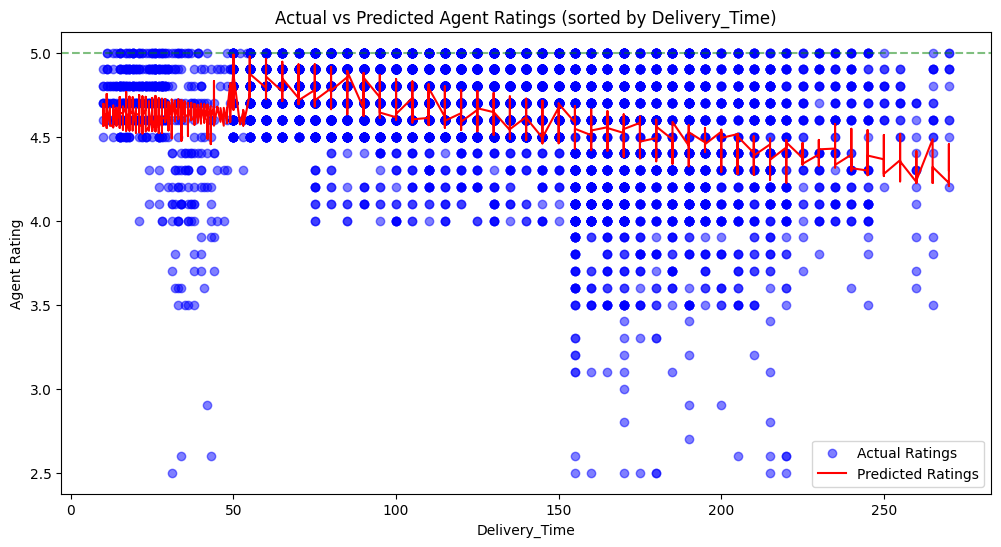

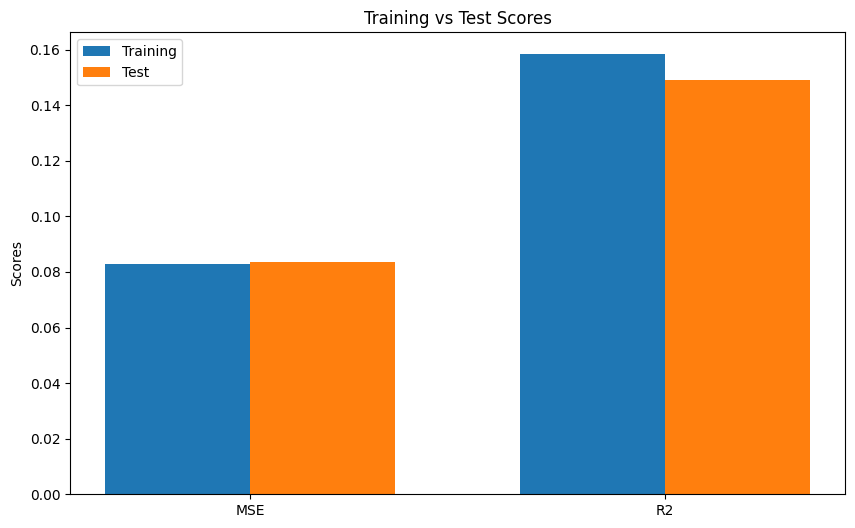

In [ ]:

# Splitting the data into training and testing sets
X = data[['Agent_Age', 'Distance_Miles', 'Delivery_Time', 'Weather_Cloudy', 'Weather_Fog',
       'Weather_Sandstorms', 'Weather_Stormy', 'Weather_Sunny',
       'Weather_Windy', 'Traffic_High ', 'Traffic_Jam ', 'Traffic_Low ',
       'Traffic_Medium ', 'Vehicle_motorcycle ', 'Vehicle_scooter ',
       'Vehicle_van', 'Area_Metropolitian ', 'Area_Other', 'Area_Semi-Urban ',
       'Area_Urban ', 'Category_Apparel', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Jewelry',
       'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies',
       'Category_Shoes', 'Category_Skincare', 'Category_Snacks',
       'Category_Sports', 'Category_Toys']]
y = data['Agent_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_training = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate performance metrics
training_mse = mean_squared_error(y_train, y_pred_training)
testing_mse = mean_squared_error(y_test, y_pred_test)
r2_training = r2_score(y_train, y_pred_training)
r2_testing = r2_score(y_test, y_pred_test)

print("Model 1 version 2")
# Print the performance metrics
print(f"Training Mean Squared Error: {training_mse}")
print(f"Training Mean Squared Error: {testing_mse}")
print(f"R-squared Training: {r2_training}")
print(f"R-squared Testing: {r2_testing}")
print(f"Coeffecients: {model.coef_}")

print("Actual ratings range:")
print(f"Minimum: {y.min()}")
print(f"Maximum: {y.max()}")
print(f"Mean: {y.mean()}")
print("\nUnique values in Agent_Rating:")
print(y.unique())

# Choose a feature to sort by (e.g., Delivery_Time)
sort_feature = 'Delivery_Time'
sort_index = X_test[sort_feature].argsort()

# Sort the actual and predicted values
y_test_sorted = y_test.iloc[sort_index]
y_pred_sorted = y_pred_test[sort_index]
x_axis = X_test[sort_feature].sort_values()

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for actual ratings
plt.scatter(x_axis, y_test_sorted, alpha=0.5, color='blue', label='Actual Ratings')

# Line plot for predicted ratings
plt.plot(x_axis, y_pred_sorted, color='red', label='Predicted Ratings')

plt.title(f'Actual vs Predicted Agent Ratings (sorted by {sort_feature})')
plt.xlabel(sort_feature)
plt.ylabel('Agent Rating')
plt.legend()

# Add a horizontal line at y=5 to show the maximum rating
plt.axhline(y=5, color='green', linestyle='--', alpha=0.5)

plt.show()

metrics = ['MSE', 'R2']
train_scores = [training_mse, r2_training]
test_scores = [testing_mse, r2_testing]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], train_scores, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Training vs Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()



# Model 1 Thoughts

We see a very slight improvement in our MSE (about a 0.06 difference), it seems like linear regression may not be the best model for our data. We now need to consider different models and weigh how their performance will better our MSE.

Furthermore, we can see that our model is not overfitting. Our training MSE (0.082) compared to our testing MSE (0.083) tells us that our model cannot be overfitting because the training MSE is not notably greater.

Otherwise, we feel content with this MSE, as it is not bad or underfitting and still has room for improvement.

# Model 2: RandomTrees

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



features = ['Delivery_Time', 'Distance_Miles', 'Agent_Age', 'Order_Pickup_Time_Diff',
            'Order_Hour', 'Pickup_Hour', 'Weather_Cloudy', 'Weather_Fog',
            'Vehicle_motorcycle ', 'Vehicle_scooter ', 'Vehicle_van', 'Area_Metropolitian ',
            'Area_Other', 'Area_Semi-Urban ', 'Area_Urban ', 'Day_of_Week', 'Is_Weekend']

target = 'Agent_Rating'

X = data[features]
y  = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_training = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate performance metrics
training_mse = mean_squared_error(y_train, y_pred_training)
testing_mse = mean_squared_error(y_test, y_pred_test)
r2_training = r2_score(y_train, y_pred_training)
r2_testing = r2_score(y_test, y_pred_test)

# Print the performance metrics
print(f"Training Mean Squared Error: {training_mse}")
print(f"Testing Mean Squared Error: {testing_mse}")
print(f"R-squared Training: {r2_training}")
print(f"R-squared Testing: {r2_testing}")

print("Actual ratings range:")
print(f"Minimum: {y.min()}")
print(f"Maximum: {y.max()}")
print(f"Mean: {y.mean()}")
print("\nUnique values in Agent_Rating:")
print(y.unique())

Training Mean Squared Error: 0.00796829270250912
Testing Mean Squared Error: 0.0566941697442367
R-squared Training: 0.9191445520414312
R-squared Testing: 0.4225795481190566
Actual ratings range:
Minimum: 2.5
Maximum: 5.0
Mean: 4.635286966096252

Unique values in Agent_Rating:
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]


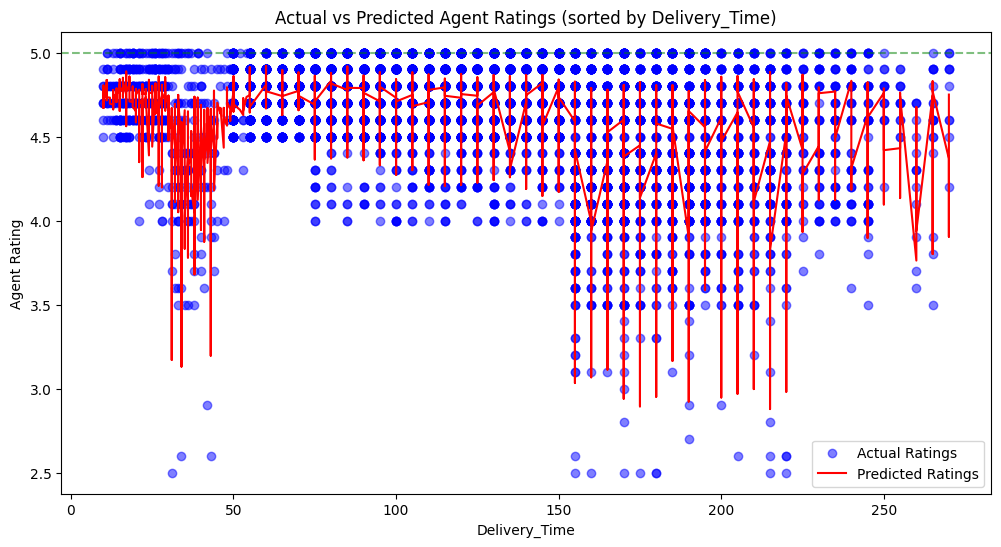

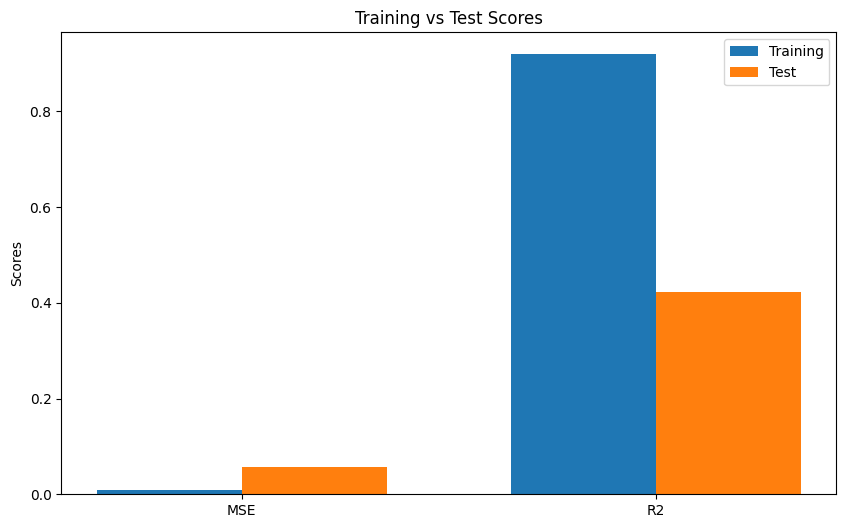

In [ ]:
# Choose a feature to sort by (e.g., Delivery_Time)
sort_feature = 'Delivery_Time'
sort_index = X_test[sort_feature].argsort()

# Sort the actual and predicted values
y_test_sorted = y_test.iloc[sort_index]
y_pred_sorted = y_pred_test[sort_index]
x_axis = X_test[sort_feature].sort_values()

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for actual ratings
plt.scatter(x_axis, y_test_sorted, alpha=0.5, color='blue', label='Actual Ratings')

# Line plot for predicted ratings
plt.plot(x_axis, y_pred_sorted, color='red', label='Predicted Ratings')

plt.title(f'Actual vs Predicted Agent Ratings (sorted by {sort_feature})')
plt.xlabel(sort_feature)
plt.ylabel('Agent Rating')
plt.legend()

# Add a horizontal line at y=5 to show the maximum rating
plt.axhline(y=5, color='green', linestyle='--', alpha=0.5)

plt.show()

metrics = ['MSE', 'R2']
train_scores = [training_mse, r2_training]
test_scores = [testing_mse, r2_testing]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], train_scores, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Training vs Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

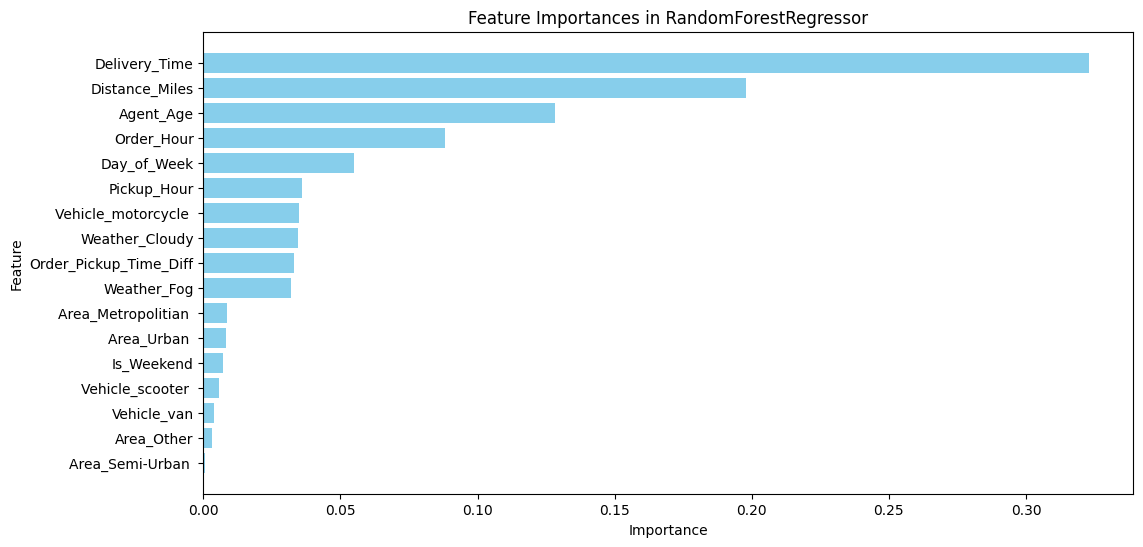

In [ ]:
# Feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForestRegressor')
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()

# Model 3: GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the model
gbm = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
best_gbm = GradientBoostingRegressor(**best_params, random_state=42)
best_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42, subsample=0.9)

In [ ]:
# Make predictions
y_pred_training = best_gbm.predict(X_train)
y_pred_test = best_gbm.predict(X_test)


# Calculate performance metrics
training_mse = mean_squared_error(y_train, y_pred_training)
testing_mse = mean_squared_error(y_test, y_pred_test)
r2_training = r2_score(y_train, y_pred_training)
r2_testing = r2_score(y_test, y_pred_test)

# Print the performance metrics
print(f"Training Mean Squared Error: {training_mse}")
print(f"Testing Mean Squared Error: {testing_mse}")
print(f"R-squared Training: {r2_training}")
print(f"R-squared Testing: {r2_testing}")

print("Actual ratings range:")
print(f"Minimum: {y.min()}")
print(f"Maximum: {y.max()}")
print(f"Mean: {y.mean()}")
print("\nUnique values in Agent_Rating:")
print(y.unique())

Training Mean Squared Error: 0.04874083835291726
Testing Mean Squared Error: 0.055384919012787005
R-squared Training: 0.5054194836918635
R-squared Testing: 0.43591404357757757
Actual ratings range:
Minimum: 2.5
Maximum: 5.0
Mean: 4.635286966096252

Unique values in Agent_Rating:
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]


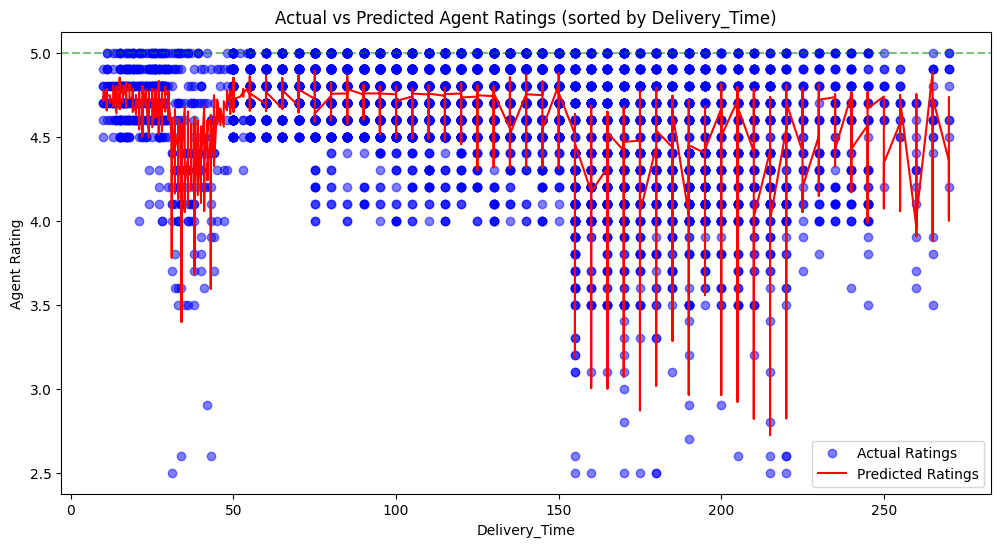

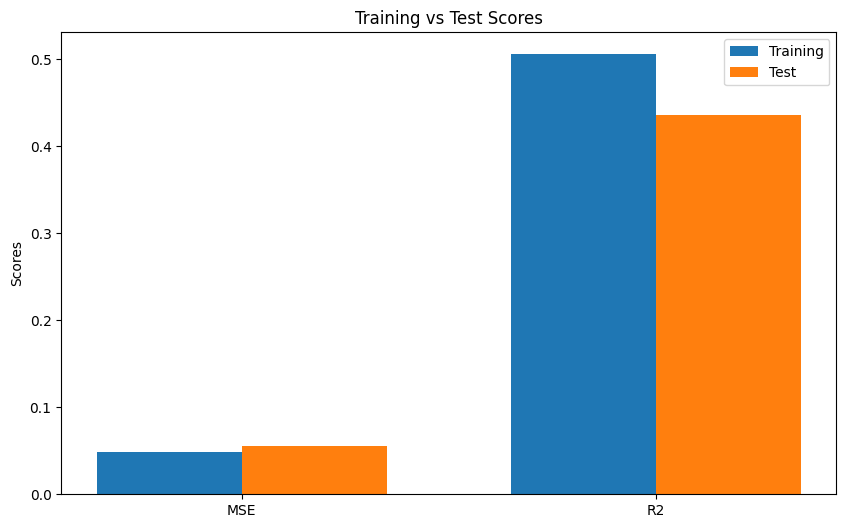

In [ ]:
# Choose a feature to sort by (e.g., Delivery_Time)
sort_feature = 'Delivery_Time'
sort_index = X_test[sort_feature].argsort()

# Sort the actual and predicted values
y_test_sorted = y_test.iloc[sort_index]
y_pred_sorted = y_pred_test[sort_index]
x_axis = X_test[sort_feature].sort_values()

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for actual ratings
plt.scatter(x_axis, y_test_sorted, alpha=0.5, color='blue', label='Actual Ratings')

# Line plot for predicted ratings
plt.plot(x_axis, y_pred_sorted, color='red', label='Predicted Ratings')

plt.title(f'Actual vs Predicted Agent Ratings (sorted by {sort_feature})')
plt.xlabel(sort_feature)
plt.ylabel('Agent Rating')
plt.legend()

# Add a horizontal line at y=5 to show the maximum rating
plt.axhline(y=5, color='green', linestyle='--', alpha=0.5)

plt.show()

metrics = ['MSE', 'R2']
train_scores = [training_mse, r2_training]
test_scores = [testing_mse, r2_testing]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], train_scores, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Training vs Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

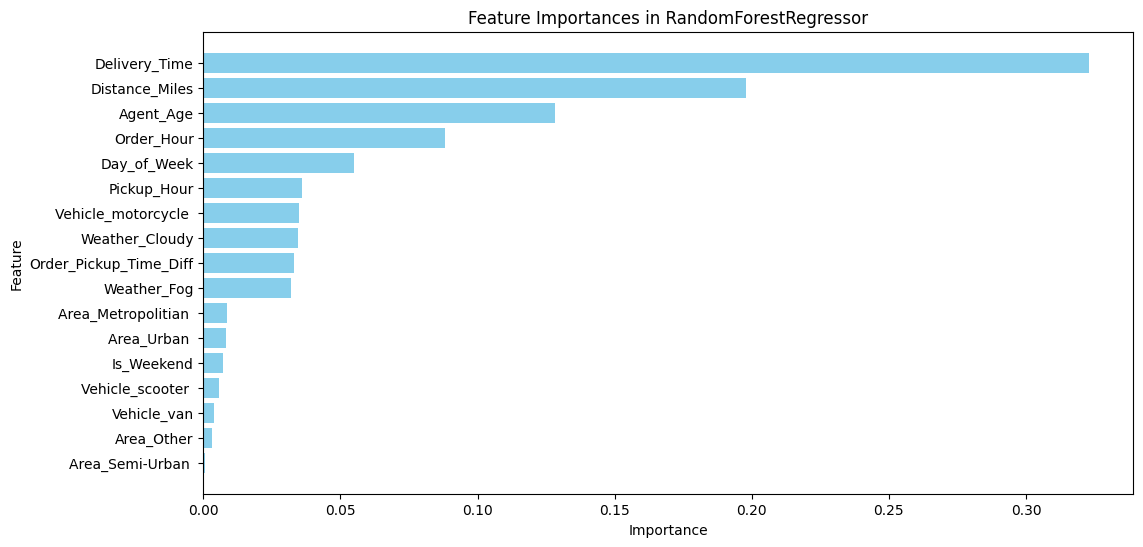

In [ ]:
# Feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForestRegressor')
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()